**Business Problem:**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.
Dataset link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094



In [1]:
#importing required library for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, t
from scipy.stats import binom,geom
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from random import sample

In [2]:
#dataset
df= pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
rows,columns = df.shape
print("columns :",columns)
print("rows :",rows)

columns : 10
rows : 550068


In [4]:
#data types
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
#conversion of catagorical data
df[["Occupation","Marital_Status","Product_Category"]]=df[["Occupation","Marital_Status","Product_Category"]].astype("object")
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [6]:
#statistical summary
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [7]:
#data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [8]:
# number of male and female users
(df[["Gender"]].value_counts())

Gender
M         414259
F         135809
dtype: int64

In [9]:
# % of males and females customer
(df[["Gender"]].value_counts()/len(df))*100

Gender
M         75.310507
F         24.689493
dtype: float64

In [10]:
# % customers in age group

(df[["Age"]].value_counts()/len(df))*100

Age  
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
dtype: float64

In [11]:
# % of male and females according to age group
(df[["Gender","Age"]].groupby("Gender").value_counts()/len(df))*100

Gender  Age  
F       26-35     9.226496
        36-45     4.939389
        18-25     4.477265
        46-50     2.399522
        51-55     1.798687
        0-17      0.924068
        55+       0.924068
M       26-35    30.693478
        36-45    15.060502
        18-25    13.640495
        46-50     5.908724
        51-55     5.200630
        55+       2.985267
        0-17      1.821411
dtype: float64

In [12]:
# % of females of total females within age groups
((df[["Gender","Age"]].groupby("Gender").value_counts().loc["F"])/135809)*100


Age
26-35    37.370130
36-45    20.006038
18-25    18.134292
46-50     9.718796
51-55     7.285231
0-17      3.742756
55+       3.742756
dtype: float64

In [13]:
# % of males of total male users within age groups
((df[["Gender","Age"]].groupby("Gender").value_counts().loc["M"])/414259)*100

Age
26-35    40.755904
36-45    19.997876
18-25    18.112340
46-50     7.845816
51-55     6.905583
55+       3.963945
0-17      2.418535
dtype: float64

In [14]:
# % of married and unmarried males and females
(df[["Gender","Marital_Status"]].groupby("Gender").value_counts()/len(df))*100

Gender  Marital_Status
F       0                 14.329319
        1                 10.360174
M       0                 44.705382
        1                 30.605125
dtype: float64


**Data Insight:**
*   Data has 550068 rows and 10 columns
*  75 % users are male and ~25% users are female
*  Majority of users, 39% users are from 26-35 age group and very few users are above age 55(3% users) and between age 0-17(~1.8%)
*   60% users are married (14% are Female and 44% are Male) and 40% users are unmarried(10% are Feamle and 30% are male)

**Visual Analysis - Univariate & Bivariate**

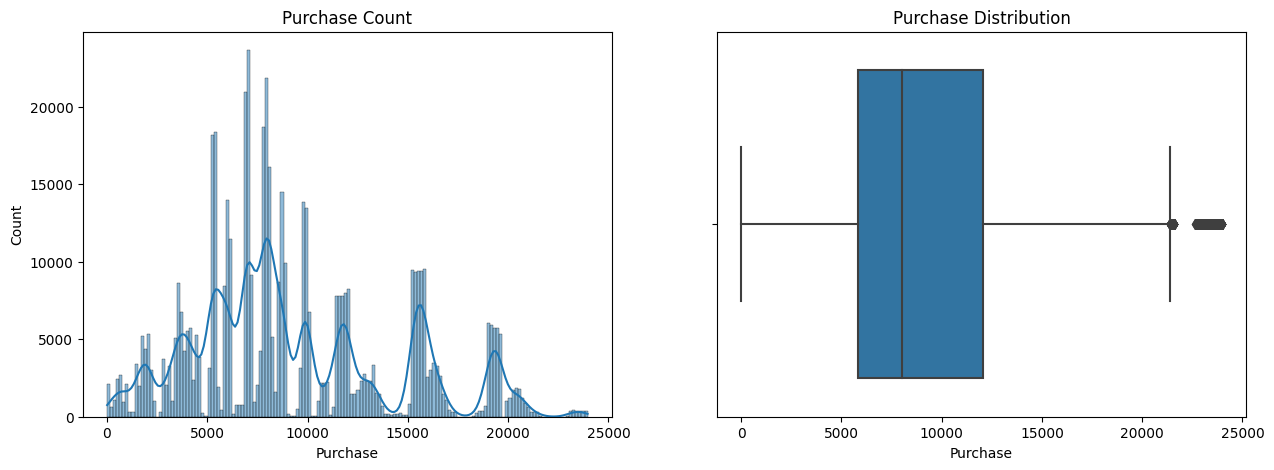

In [15]:
#distrubution of purchase
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df["Purchase"],kde=True)
plt.title("Purchase Count")
plt.subplot(1,2,2)
sns.boxplot(data=df,x="Purchase")
plt.title("Purchase Distribution")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

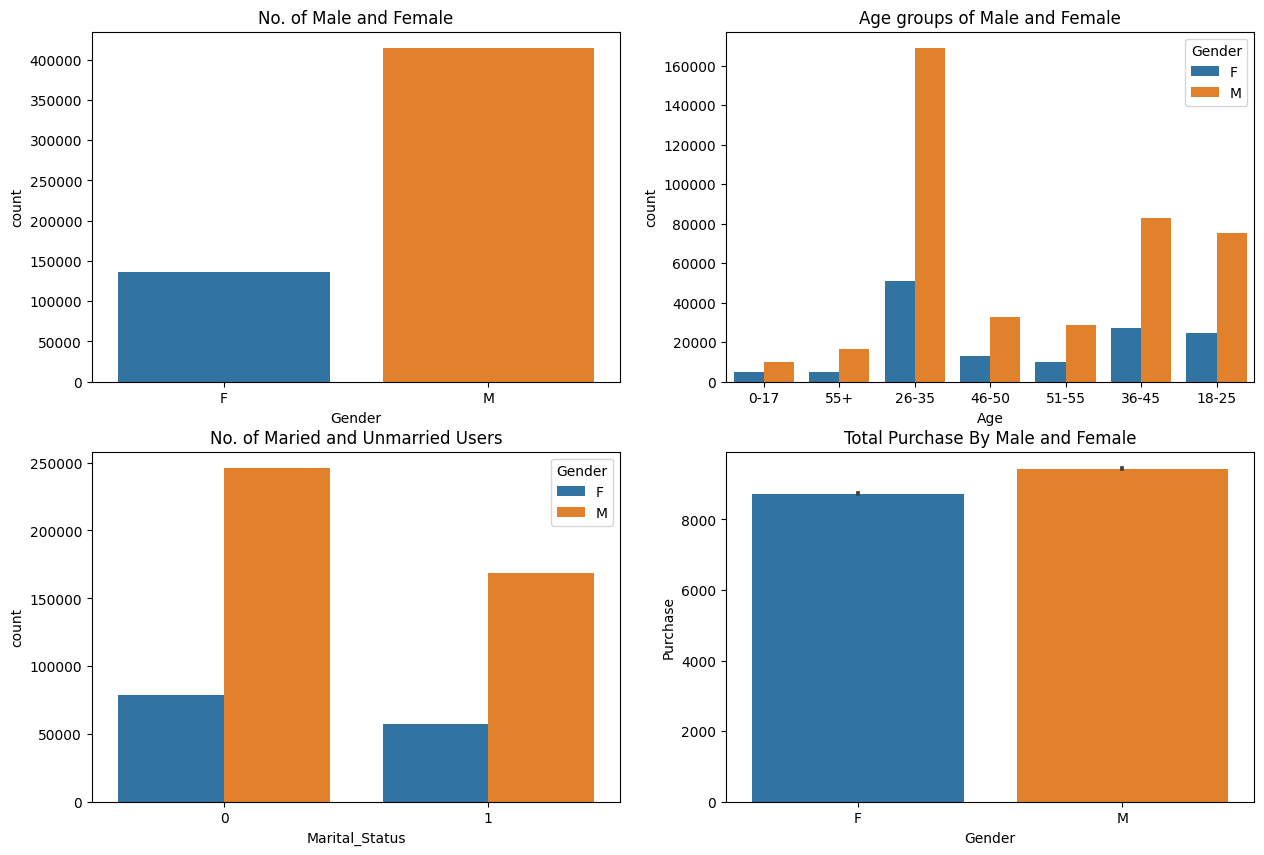

In [16]:
#count plots
fig=plt.figure( figsize =(15,10))
plt.subplot(2,2,1)
sns.countplot(data=df,x="Gender")
plt.title("No. of Male and Female")
plt.subplot(2,2,2)
sns.countplot(data=df,x="Age",hue="Gender")
plt.title("Age groups of Male and Female")
plt.subplot(2,2,3)
sns.countplot(data=df,x="Marital_Status",hue="Gender")
plt.title("No. of Maried and Unmarried Users")
plt.subplot(2,2,4)
sns.barplot(data=df,x="Gender",y="Purchase")
plt.title("Total Purchase By Male and Female")
plt.show

**Insight**

*   Male Users are high compare to female
*   Majority of users are from 26-35 age group, both male and female
*   Married male and female users are high compare to unmarried users
*   No of married and unmarried male users are high compare to married and unmarried female users respectively
*   Though number male users are significantly high but there is not a significant difference in total purchase by male and female user
*   `7000 is the high amount which has been purchased by uers
*   Outlier values are present in purchase



<function matplotlib.pyplot.show(close=None, block=None)>

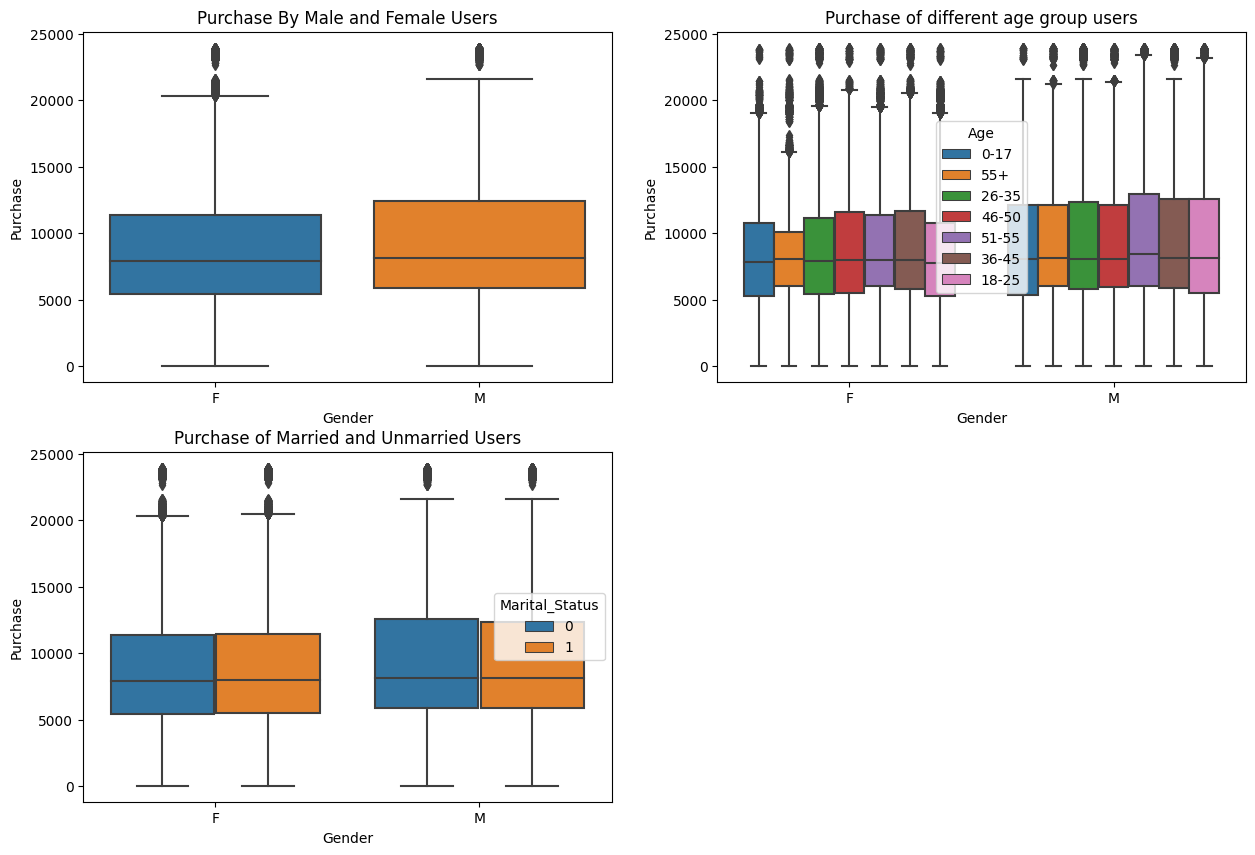

In [60]:
#Analysis for gender vs purchase using box plot
fig=plt.figure( figsize =(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x="Gender",y="Purchase")
plt.title("Purchase By Male and Female Users")
plt.subplot(2,2,2)
sns.boxplot(data=df,x="Gender",y="Purchase",hue="Age")
plt.title("Purchase of different age group users")
plt.subplot(2,2,3)
sns.boxplot(data=df,x="Gender",y="Purchase",hue="Marital_Status")
plt.title("Purchase of Married and Unmarried Users")
plt.show

In [18]:
#checking missing values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No Missing values are present and outliers are presnet based on boxplot analysis

In [19]:
# total and average expenses by individual male and feamle user
expenses = df.groupby(by=["User_ID","Gender"])[["Purchase"]].aggregate(["sum","mean"]).reset_index()
expenses

User_ID Gender Purchase              
                          sum          mean
0     1000001      F   334093   9545.514286
1     1000002      M   810472  10525.610390
2     1000003      M   341635  11780.517241
3     1000004      M   206468  14747.714286
4     1000005      M   821001   7745.292453
...       ...    ...      ...           ...
5886  1006036      F  4116058   8007.894942
5887  1006037      F  1119538   9176.540984
5888  1006038      F    90034   7502.833333
5889  1006039      F   590319   7977.283784
5890  1006040      M  1653299   9184.994444

[5891 rows x 4 columns]

In [20]:
#Total Expenses of male and female customers
Total_expense = df.groupby(by=["Gender"])[["Purchase"]].sum().reset_index()
Total_expense

,Gender,Purchase
0,F,1186232642
1,M,3909580100


In [21]:
#Average Expenses of male and female customers
Average_expense = df.groupby(by=["Gender"])[["Purchase"]].mean().reset_index()
Average_expense

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


In [22]:
#Average Expenses of married and unmarried male and female customers
Average_expense = df.groupby(by=["Gender","Marital_Status"])[["Purchase"]].mean().reset_index()
Average_expense

,Gender,Marital_Status,Purchase
0,F,0,8679.845815
1,F,1,8810.249789
2,M,0,9453.756740
3,M,1,9413.817605


In [23]:
#Average Expenses male and female customers average expanse acording to age group
Average_expense = df.groupby(by=["Gender","Age"])[["Purchase"]].mean().reset_index()

Average_expense

,Gender,Age,Purchase
0,F,0-17,8338.771985
1,F,18-25,8343.180201
2,F,26-35,8728.251754
3,F,36-45,8959.844056
4,F,46-50,8842.098947
5,F,51-55,9042.449666
6,F,55+,9007.036199
7,M,0-17,9235.173670
8,M,18-25,9440.942971
9,M,26-35,9410.337578


In [24]:
df_mf=df.groupby(by=["User_ID","Gender"])[["Purchase"]].sum().reset_index()
df_mf


,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [25]:
df_mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_ID   5891 non-null   int64 
 1   Gender    5891 non-null   object
 2   Purchase  5891 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 138.2+ KB


In [26]:
df_male=df_mf[df_mf["Gender"]=="M"] # male customer's total purchase
df_female=df_mf[df_mf["Gender"]=="F"] # female customer's total purchase


In [27]:
df_male=df_mf[df_mf["Gender"]=="M"]["Purchase"].mean()
df_female=df_mf[df_mf["Gender"]=="F"]["Purchase"].mean()
print("Male Average Spend :",df_male)
print("Female Average Spend :",df_female)
if df_male > df_female:
  print("Male customers expenses are higher then female customers.")
else:
  print("Female customers expenses are higher then male customers.")

Male Average Spend : 925344.4023668639
Female Average Spend : 712024.3949579832
Male customers expenses are higher then female customers.


**Insights**

*   Males total and average expenses are higher then female customers
*   Maried and unmarried males are spending almot equal amount
*   Within age groups also male customer's expenses are higher compare to respective female age group
*   Male customers average expenses are higher then female customers.






# **Central Limit Theoram**

# **Confidence interval of average purchase amount for male and female users**

In [28]:
df_mf #male and female purchase data
df_male=df_mf[df_mf["Gender"]=="M"] # male customer's total purchase
df_female=df_mf[df_mf["Gender"]=="F"] # female customer's total purchase

In [29]:
male_df_size = 2500
female_df_size = 2000
repitations = 1500
male_mean = []
female_mean = []

for i in range(repitations):
  male_means = df_male.sample(n=male_df_size,replace=True)["Purchase"].mean()
  female_means =df_female.sample(n=female_df_size,replace=True)["Purchase"].mean()
  male_mean.append(male_means)
  female_mean.append(female_means)


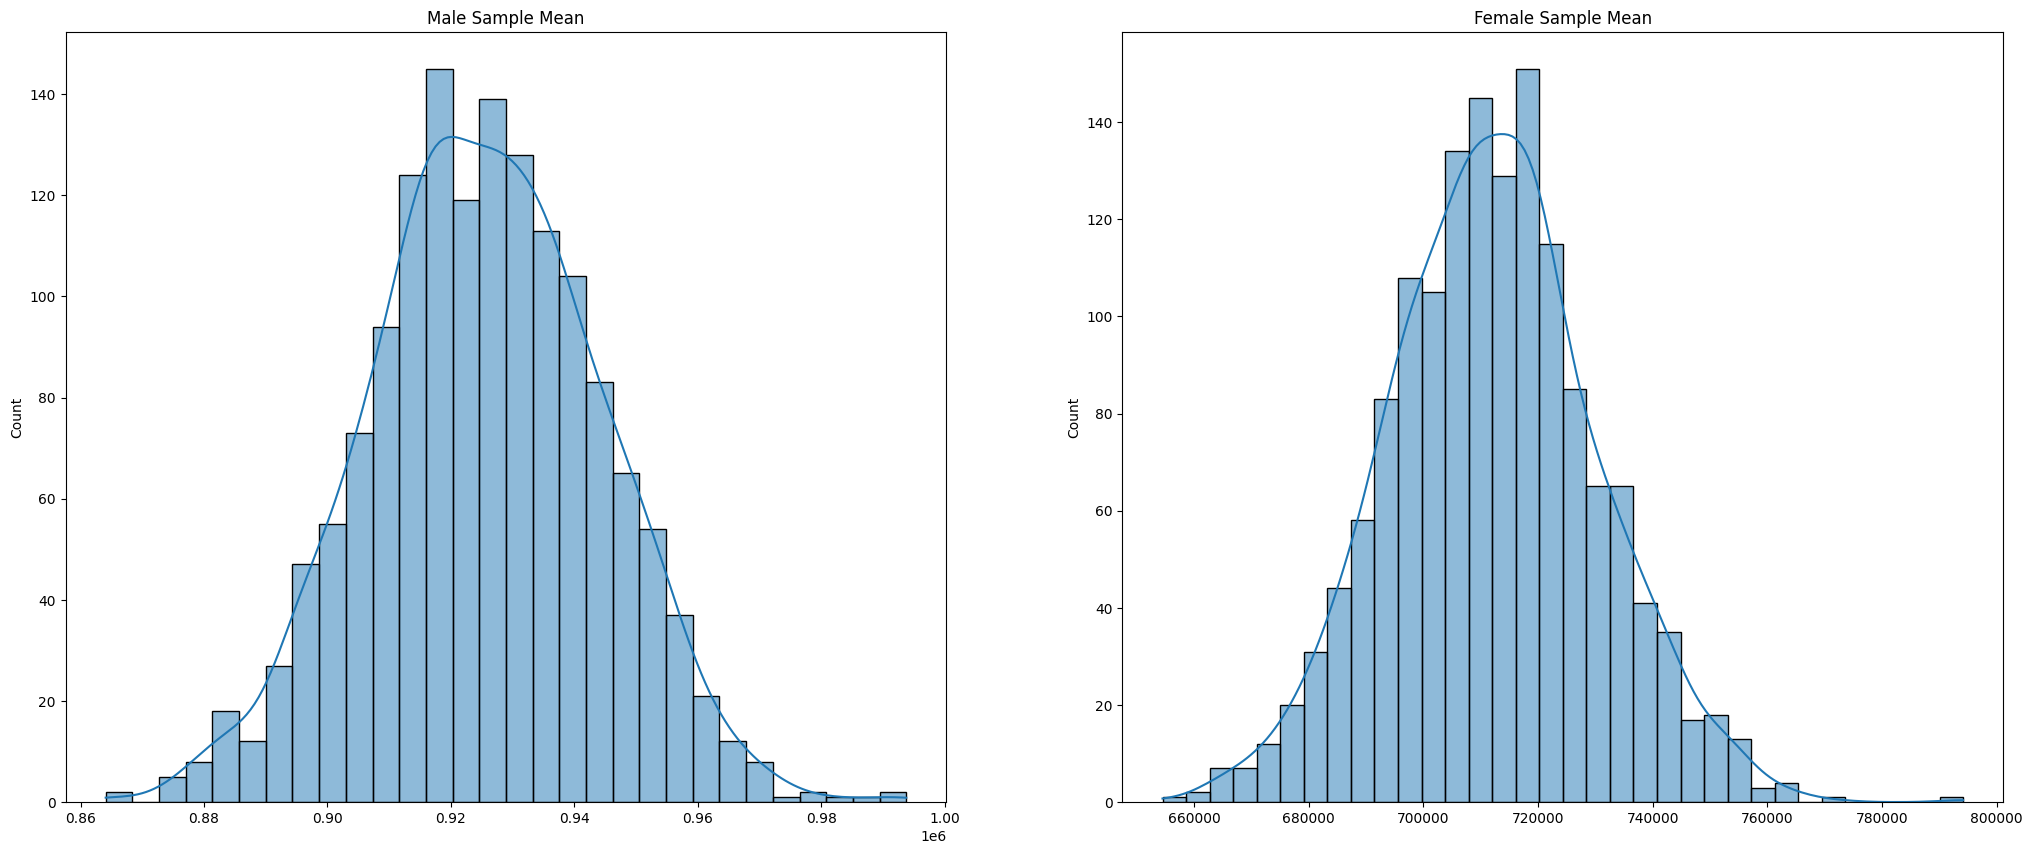

In [30]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.histplot(male_mean,kde=True)
plt.title("Male Sample Mean")
plt.subplot(1,2,2)
sns.histplot(female_mean,kde=True)
plt.title("Female Sample Mean")
plt.show()

In [31]:
Total_Male_Population_Mean = df_male["Purchase"].mean()
Total_Female_Population_Mean = df_female["Purchase"].mean()
Total_Male_Population_Std=np.std(df_male["Purchase"])
Total_Female_Population_Std=np.std(df_female["Purchase"])
Sample_Male_Mean = np.mean(male_mean)
Sample_Female_Mean = np.mean(female_mean)
print("Mean")
print("Total_Male_Population_Mean_Purchase :",Total_Male_Population_Mean)
print("Total_Female_Population_Mean_Purchase :",Total_Female_Population_Mean)
print(" ")
print("Standard Deviation")
print("Total_Male_Population_Std :",Total_Male_Population_Std)
print("Total_Female_Population_Std :",Total_Female_Population_Std)
print(" ")
print("Sample Mean")
print("Sample_Male_Mean_Purchase :",Sample_Male_Mean)
print("Sample_Female_Mean_Purchase :",Sample_Female_Mean)
print(" ")
print("sample Size")
print("male_df_size :",male_df_size)
print("female_df_size :",female_df_size)

Mean
Total_Male_Population_Mean_Purchase : 925344.4023668639
Total_Female_Population_Mean_Purchase : 712024.3949579832
 
Standard Deviation
Total_Male_Population_Std : 985713.4276071222
Total_Female_Population_Std : 807128.3816336752
 
Sample Mean
Sample_Male_Mean_Purchase : 925334.3155821332
Sample_Female_Mean_Purchase : 712086.3654176666
 
sample Size
male_df_size : 2500
female_df_size : 2000


In [32]:
#With 95% confidence
male_interval_95= norm.interval(0.95,loc=Sample_Male_Mean ,scale=Total_Male_Population_Std /np.sqrt(male_df_size ))
female_interval_95 = norm.interval(0.95,loc=Sample_Female_Mean,scale=Total_Female_Population_Std/np.sqrt(female_df_size))
print("95% Confidence Interval for Male Sample mean is ",male_interval_95)
print("95% Confidence Interval for Female Sample mean is ",female_interval_95)

95% Confidence Interval for Male Sample mean is  (886695.0592383834, 963973.5719258831)
95% Confidence Interval for Female Sample mean is  (676713.0544356159, 747459.6763997173)


In [33]:
#With 99% confidence
male_interval_99= norm.interval(0.99,loc=Sample_Male_Mean ,scale=Total_Male_Population_Std /np.sqrt(male_df_size ))
female_interval_99 = norm.interval(0.99,loc=Sample_Female_Mean,scale=Total_Female_Population_Std/np.sqrt(female_df_size))
print("99% Confidence Interval for Male Sample mean is ",male_interval_99)
print("99% Confidence Interval for Female Sample mean is ",female_interval_99)

99% Confidence Interval for Male Sample mean is  (874553.7249474922, 976114.9062167743)
99% Confidence Interval for Female Sample mean is  (665597.9545540882, 758574.776281245)


**Insights**

*   With 99% confidence,
      1.  Male customer's average expenses will be between (875396.7129144256, 976957.8941837077)
      2.  Female customer's average expenses will be between (665710.2028617549, 758687.0245889118)

*   With 95% confidence,
      1.  Male customer's average expenses will be between (887538.0472053168, 964816.5598928165)
      2.  Female customer's average expenses will be between (676825.3027432826, 747571.9247073841)

*   With 99% and 95%, confidence intervals of average male and female spendings are not overlapping


# **Confidence interval of average purchase amount for married and unmarried users**


In [34]:
df_married_unmarried=df.groupby(by=["User_ID","Marital_Status"])[["Purchase"]].sum().reset_index()
df_married_unmarried #married and unmarried customer purchase data, 0 = married and 1 = unmarried

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [35]:
df_married_unmarried.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User_ID         5891 non-null   int64
 1   Marital_Status  5891 non-null   int64
 2   Purchase        5891 non-null   int64
dtypes: int64(3)
memory usage: 138.2 KB


In [36]:
df_mf #male and female purchase data
df_married=df_married_unmarried[df_married_unmarried["Marital_Status"]==0] # married customer's total purchase
df_unmarried=df_married_unmarried[df_married_unmarried["Marital_Status"]==1] # unmarried customer's total purchase

In [37]:
married_df_size = 2500
unmarried_df_size = 2000
repitations = 1500
married_means = []
unmarried_means = []

for i in range(repitations):
  married_mean = df_married.sample(n=married_df_size,replace=True)["Purchase"].mean()
  unmarried_mean =df_unmarried.sample(n=unmarried_df_size,replace=True)["Purchase"].mean()
  married_means.append(married_mean)
  unmarried_means.append(unmarried_mean)

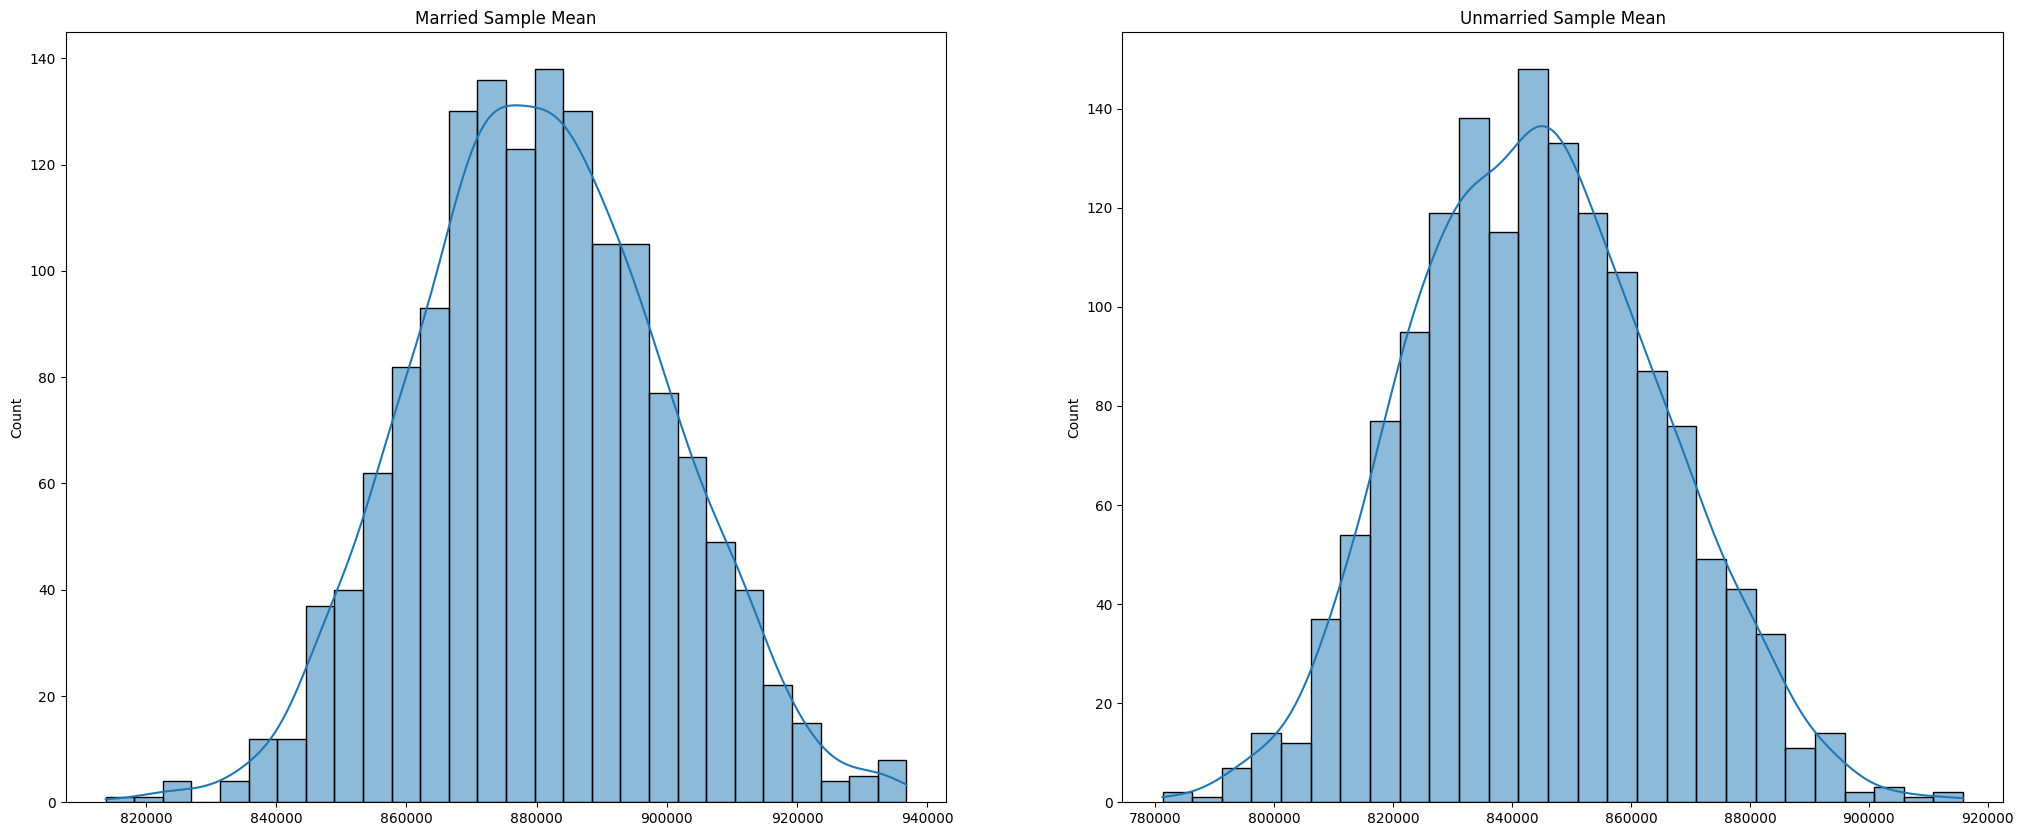

In [38]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.histplot(married_means,kde=True)
plt.title("Married Sample Mean")
plt.subplot(1,2,2)
sns.histplot(unmarried_means,kde=True)
plt.title("Unmarried Sample Mean")
plt.show()

In [39]:
Total_Married_Population_Mean = df_married["Purchase"].mean()
Total_Unmarried_Population_Mean = df_unmarried["Purchase"].mean()

Total_Married_Population_Std=np.std(df_married["Purchase"])
Total_unmarried_Population_Std=np.std(df_unmarried["Purchase"])

Sample_Marreid_Mean_Purchase = np.mean(married_means)
Sample_Unmarried_Mean_Purchase = np.mean(unmarried_means)
print("Mean")
print("Total_Married_Population_Mean :",Total_Married_Population_Mean)
print("Total_Unmarried_Population_Mean :",Total_Unmarried_Population_Mean)
print(" ")
print("Standard Deviation")
print("Total_Married_Population_Std :",Total_Married_Population_Std)
print("Total_unmarried_Population_Std :",Total_unmarried_Population_Std)
print(" ")
print("Sample Mean")
print("Sample_Marreid_Mean_Purchase :",Sample_Marreid_Mean_Purchase)
print("Sample_Unmarried_Mean_Purchase :",Sample_Unmarried_Mean_Purchase)
print(" ")
print("sample Size")
print("married_df_size :",married_df_size)
print("unmarried_df_size :",unmarried_df_size)

Mean
Total_Married_Population_Mean : 880575.7819724905
Total_Unmarried_Population_Mean : 843526.7966855295
 
Standard Deviation
Total_Married_Population_Std : 949297.3110530607
Total_unmarried_Population_Std : 935163.0603173216
 
Sample Mean
Sample_Marreid_Mean_Purchase : 880479.6191226667
Sample_Unmarried_Mean_Purchase : 844210.653785
 
sample Size
married_df_size : 2500
unmarried_df_size : 2000


In [40]:
#With 95% confidence
marreid_interval_95= norm.interval(0.95,loc=Sample_Marreid_Mean_Purchase  ,scale=Total_Married_Population_Std/np.sqrt(married_df_size))
unmarried_interval_95 = norm.interval(0.95,loc=Sample_Unmarried_Mean_Purchase ,scale=Total_unmarried_Population_Std /np.sqrt(unmarried_df_size ))
print("With 95% Confidence,Confidence Interval for Married users Sample purchase mean is ",marreid_interval_95)
print("With 95% Confidence,Confidence Interval for Unmarried users Sample purchase mean is ",unmarried_interval_95)

With 95% Confidence,Confidence Interval for Married users Sample purchase mean is  (843267.8483169724, 917691.3899283609)
With 95% Confidence,Confidence Interval for Unmarried users Sample purchase mean is  (803226.0787108645, 885195.2288591354)


In [41]:
#With 99% confidence
marreid_interval_99= norm.interval(0.99,loc=Sample_Marreid_Mean_Purchase  ,scale=Total_Married_Population_Std/np.sqrt(married_df_size))
unmarried_interval_99 = norm.interval(0.99,loc=Sample_Unmarried_Mean_Purchase ,scale=Total_unmarried_Population_Std /np.sqrt(unmarried_df_size ))
print("With 99% Confidence,Confidence Interval for Married users Sample purchase mean is ",marreid_interval_99)
print("With 99% Confidence,Confidence Interval for Unmarried users Sample purchase mean is ",unmarried_interval_99)

With 99% Confidence,Confidence Interval for Married users Sample purchase mean is  (831575.0624908537, 929384.1757544796)
With 99% Confidence,Confidence Interval for Unmarried users Sample purchase mean is  (790347.7918639774, 898073.5157060225)


In [42]:
#With 90% confidence
marreid_interval_90= norm.interval(0.90,loc=Sample_Marreid_Mean_Purchase  ,scale=Total_Married_Population_Std/np.sqrt(married_df_size))
unmarried_interval_90 = norm.interval(0.90,loc=Sample_Unmarried_Mean_Purchase ,scale=Total_unmarried_Population_Std /np.sqrt(unmarried_df_size ))
print("With 90% Confidence,Confidence Interval for Married users Sample purchase mean is ",marreid_interval_90)
print("With 90% Confidence,Confidence Interval for Unmarried users Sample purchase mean is ",unmarried_interval_90)

With 90% Confidence,Confidence Interval for Married users Sample purchase mean is  (849250.5166198486, 911708.7216254848)
With 90% Confidence,Confidence Interval for Unmarried users Sample purchase mean is  (809815.3141300335, 878605.9934399665)


**Insights**

*   With 99% confidence,
      1.  Married customer's average expenses will be between (831230.5463183203, 929039.6595819462)
      2.  Unmarried customer's average expenses will be between (788853.5494489775, 896579.2732910225)

*   With 95% confidence,
      1.  Married customer's average expenses will be between (842923.332144439, 917346.8737558275)
      2.  Unmarried customer's average expenses will be between (801731.8362958645, 883700.9864441354)

*   With 99%, 95% and 90%, confidence intervals of Married and Unmarried average spendings are overlapping

# **Confidence interval of average purchase amount for different age group users**

In [43]:
df_age=df.groupby(by=["User_ID","Age"])[["Purchase"]].sum().reset_index()
df_age # customer purchase data according to age

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [44]:
df_age["Age"].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [47]:
age_df_size = 150
repitations = 1500
age_0_17_mean = []
age_18_25_mean = []
age_26_35_mean = []
age_36_45_mean = []
age_46_50_mean = []
age_51_55_mean = []
age_55_plus_mean = []
#amt_df[amt_df['Age']==age_interval]
for i in range(repitations):
  age_0_17_means = df_age[df_age["Age"]== "0-17"].sample(n=age_df_size,replace=True)["Purchase"].mean()
  age_18_25_means = df_age[df_age["Age"]=="18-25"].sample(n=age_df_size,replace=True)["Purchase"].mean()
  age_26_35_means = df_age[df_age["Age"]=="26-35"].sample(n=age_df_size,replace=True)["Purchase"].mean()
  age_36_45_means = df_age[df_age["Age"]=="36-45"].sample(n=age_df_size,replace=True)["Purchase"].mean()
  age_46_50_means = df_age[df_age["Age"]=="46-50"].sample(n=age_df_size,replace=True)["Purchase"].mean()
  age_51_55_means = df_age[df_age["Age"]=="51-55"].sample(n=age_df_size,replace=True)["Purchase"].mean()
  age_55_plus_means = df_age[df_age["Age"]=="55+"].sample(n=age_df_size,replace=True)["Purchase"].mean()

  age_0_17_mean.append(age_0_17_means)
  age_18_25_mean.append(age_18_25_means)
  age_26_35_mean.append(age_26_35_means)
  age_36_45_mean.append(age_36_45_means)
  age_46_50_mean.append(age_46_50_means)
  age_51_55_mean.append(age_51_55_means)
  age_55_plus_mean.append(age_55_plus_means)


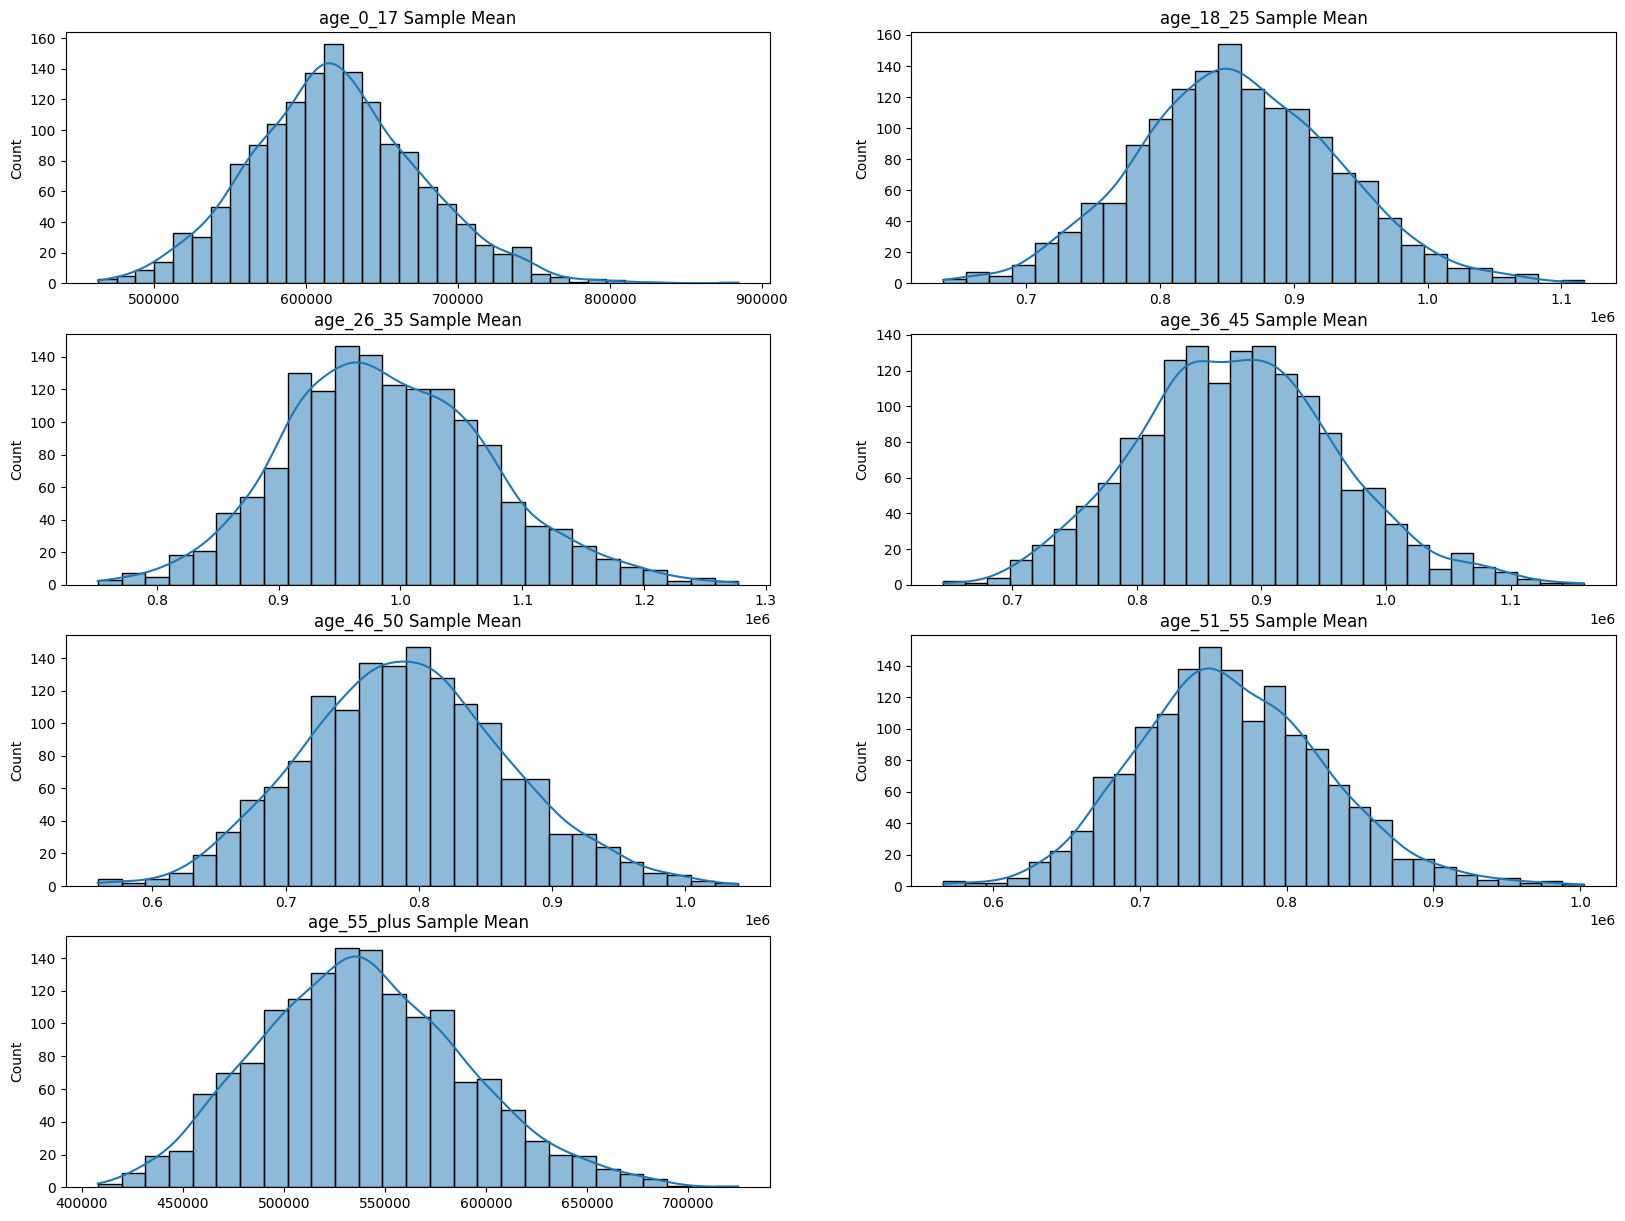

In [48]:
plt.figure(figsize=(20,15))

plt.subplot(4,2,1)
sns.histplot(age_0_17_mean,kde=True)
plt.title("age_0_17 Sample Mean")

plt.subplot(4,2,2)
sns.histplot(age_18_25_mean,kde=True)
plt.title("age_18_25 Sample Mean")

plt.subplot(4,2,3)
sns.histplot(age_26_35_mean,kde=True)
plt.title("age_26_35 Sample Mean")

plt.subplot(4,2,4)
sns.histplot(age_36_45_mean,kde=True)
plt.title("age_36_45 Sample Mean")

plt.subplot(4,2,5)
sns.histplot(age_46_50_mean,kde=True)
plt.title("age_46_50 Sample Mean")

plt.subplot(4,2,6)
sns.histplot(age_51_55_mean,kde=True)
plt.title("age_51_55 Sample Mean")

plt.subplot(4,2,7)
sns.histplot(age_55_plus_mean,kde=True)
plt.title("age_55_plus Sample Mean")
plt.show()

In [46]:
df_age_mean = df_age.groupby(by="Age")[["Purchase"]].aggregate(["mean","std"]).reset_index()
df_age_mean

Age       Purchase              
                   mean           std
0   0-17  618867.811927  6.870566e+05
1  18-25  854863.119738  8.879573e+05
2  26-35  989659.317097  1.031610e+06
3  36-45  879665.710368  9.815804e+05
4  46-50  792548.781544  9.292989e+05
5  51-55  763200.923077  7.923222e+05
6    55+  539697.244624  6.174789e+05

In [54]:
sample_age_0_17_mean = np.mean(age_0_17_mean)
sample_age_18_25_mean = np.mean(age_18_25_mean)
sample_age_26_35_mean = np.mean(age_26_35_mean)
sample_age_36_45_mean = np.mean(age_36_45_mean)
sample_age_46_50_mean = np.mean(age_46_50_mean)
sample_age_51_55_mean = np.mean(age_51_55_mean)
sample_age_55_plus_mean = np.mean(age_55_plus_mean)

print("sample_age_0_17_mean :",sample_age_0_17_mean)
print("sample_age_18_25_mean :",sample_age_26_35_mean)
print("sample_age_26_35_mean :",sample_age_26_35_mean)
print("sample_age_36_45_mean :",sample_age_36_45_mean)
print("sample_age_46_50_mean :",sample_age_46_50_mean)
print("sample_age_51_55_mean :",sample_age_51_55_mean)
print("sample_age_55_plus_mean :",sample_age_55_plus_mean)
print(" ")
print("age_df_size = 150")

sample_age_0_17_mean : 619801.5231333334
sample_age_18_25_mean : 989407.0636622222
sample_age_26_35_mean : 989407.0636622222
sample_age_36_45_mean : 880963.232
sample_age_46_50_mean : 790632.2117866665
sample_age_51_55_mean : 762304.8556755555
sample_age_55_plus_mean : 538932.3705244445
 
age_df_size = 150


In [58]:
#With 95% confidence

age_0_17_interval_95= norm.interval(0.95,loc=sample_age_0_17_mean ,scale=6.870566e+05/np.sqrt(age_df_size))
age_18_25_interval_95= norm.interval(0.95,loc=sample_age_18_25_mean ,scale=8.879573e+05/np.sqrt(age_df_size))
age_26_35_interval_95= norm.interval(0.95,loc=sample_age_26_35_mean ,scale=1.031610e+06/np.sqrt(age_df_size))
age_36_45_interval_95= norm.interval(0.95,loc=sample_age_36_45_mean ,scale=9.815804e+05/np.sqrt(age_df_size))
age_46_50_interval_95= norm.interval(0.95,loc=sample_age_46_50_mean ,scale=	9.292989e+05/np.sqrt(age_df_size))
age_51_55_interval_95= norm.interval(0.95,loc=sample_age_51_55_mean ,scale=7.923222e+05/np.sqrt(age_df_size))
age_55_plus_interval_95= norm.interval(0.95,loc=sample_age_55_plus_mean ,scale=6.174789e+05/np.sqrt(age_df_size))

print("With 95% Confidence,Confidence Interval for 0-17 age group Sample purchase mean is ",age_0_17_interval_95)
print("With 95% Confidence,Confidence Interval for 18-25 age group Sample purchase mean is ",age_18_25_interval_95)
print("With 95% Confidence,Confidence Interval for 26-35 age group Sample purchase mean is ",age_26_35_interval_95)
print("With 95% Confidence,Confidence Interval for 36-45 age group Sample purchase mean is ",age_36_45_interval_95)
print("With 95% Confidence,Confidence Interval for 46-50 age group Sample purchase mean is ",age_46_50_interval_95)
print("With 95% Confidence,Confidence Interval for 51-55 age group Sample purchase mean is ",age_51_55_interval_95)
print("With 95% Confidence,Confidence Interval 50+ age group Sample purchase mean is ",age_55_plus_interval_95)

With 95% Confidence,Confidence Interval for 0-17 age group Sample purchase mean is  (509851.58802476746, 729751.4582418994)
With 95% Confidence,Confidence Interval for 18-25 age group Sample purchase mean is  (715547.4905975023, 999747.7952424979)
With 95% Confidence,Confidence Interval for 26-35 age group Sample purchase mean is  (824318.1138473921, 1154496.0134770523)
With 95% Confidence,Confidence Interval for 36-45 age group Sample purchase mean is  (723880.5385452828, 1038045.9254547171)
With 95% Confidence,Confidence Interval for 46-50 age group Sample purchase mean is  (641916.1471255283, 939348.2764478048)
With 95% Confidence,Confidence Interval for 51-55 age group Sample purchase mean is  (635509.2256283714, 889100.4857227397)
With 95% Confidence,Confidence Interval 50+ age group Sample purchase mean is  (440116.9818273434, 637747.7592215457)


**Insights**


*   75 % users are male and ~25% users are female
*   Majority of users, 39% users are from 26-35 age group and very few users are above age 55(3% users) and between age 0-17(~1.8%)
*   60% users are married (14% are Female and 44% are Male) and 40% users are unmarried(10% are Feamle and 30% are male)
*   Male customers average expenses are higher then female customers

**CLT Exploratrion for Purchase of male and female users**

With 99% confidence,
  *   Male customer's average expenses will be between (875396.7129144256, 976957.8941837077)
  *   Female customer's average expenses will be between (665710.2028617549, 758687.0245889118)

With 95% confidence,
  *   Male customer's average expenses will be between (887538.0472053168, 964816.5598928165)
  *   Female customer's average expenses will be between (676825.3027432826, 747571.9247073841)

With 99% and 95%, confidence intervals of average male and female spendings are not overlapping

**CLT Exploratrion for Purchase of married and unmarried users**

With 99% confidence,

*   Married customer's average expenses will be between (831230.5463183203, 929039.6595819462)
*   Unmarried customer's average expenses will be between (788853.5494489775, 896579.2732910225)

With 95% confidence,

*   Married customer's average expenses will be between (842923.332144439, 917346.8737558275)
*   Unmarried customer's average expenses will be between (801731.8362958645, 883700.9864441354)

With 99%, 95% and 90%, confidence intervals of Married and Unmarried average spendings are overlapping

**CLT Exploratrion for Purchase of different age group users**

With 95% Confidence,

      confidence interval for,
        *   0-17 age group is between (509851.58802476746, 729751.4582418994)
        *   18-25 age group is between (715547.4905975023, 999747.7952424979)
        *   26-35 age group is between (824318.1138473921, 1154496.0134770523)
        *   36-45 age group is between (723880.5385452828, 1038045.9254547171)
        *   46-50 age group is between (641916.1471255283, 939348.2764478048)
        *   51-55 age group is between (635509.2256283714, 889100.4857227397)
        *   50+ age is between (440116.9818273434, 637747.7592215457)

**Recommendations**

*   Since expenses of male customers high, compny shoud try to get hold on male customer and provide such schemes to attract female customers
*   Totoal numbers of users age is from 17 to 45,hence company should attract more users from same age group.
*   Need some stretagy to attract more users from 55+ age group
